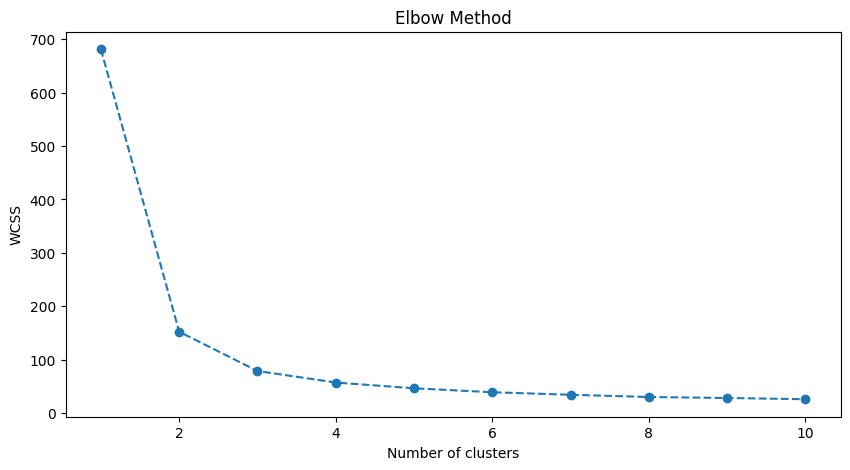

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [2]:
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', parser='auto')
X, y = mnist.data, mnist.target

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Without PCA
start_time = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
end_time = time.time()
accuracy_without_pca = accuracy_score(y_test, y_pred)
time_without_pca = end_time - start_time

# With PCA
pca = PCA(0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start_time_pca = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
end_time_pca = time.time()
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
time_with_pca = end_time_pca - start_time_pca

print(f"Without PCA - Accuracy: {accuracy_without_pca:.4f}, Time: {time_without_pca:.2f} seconds")
print(f"With PCA - Accuracy: {accuracy_with_pca:.4f}, Time: {time_with_pca:.2f} seconds")


Without PCA - Accuracy: 0.9165, Time: 124.25 seconds
With PCA - Accuracy: 0.9216, Time: 54.69 seconds
